In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist, fashion_mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow.keras import regularizers

import os

In [2]:
train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
test_dir = "/kaggle/input/brain-tumor-classification-mri/Testing"

In [3]:
batch_size = 32
image_width = 150
image_height = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir, # file path
  seed=123, # seed
  image_size= (image_width, image_height), # size of image
  batch_size=batch_size,
  label_mode='categorical') # number of images per batch

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir, # file path
  seed=123, # seed
  image_size= (image_width, image_height), # size of image
  batch_size=batch_size,
  label_mode='categorical') # number of images per batch


Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


# **DEEP CNN**

In [4]:
model = kb.Sequential()
model.add(kb.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(kb.layers.Dropout(0.3))
model.add(kb.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))
model.add(kb.layers.Dropout(0.3))

model.add(kb.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))
model.add(kb.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))
model.add(kb.layers.Dropout(0.3))

model.add(kb.layers.Flatten())
model.add(kb.layers.Dense(128, activation='relu'))
model.add(kb.layers.Dropout(0.3))
model.add(kb.layers.Dense(64, activation='relu'))
model.add(kb.layers.Dropout(0.3))
model.add(kb.layers.Dense(4, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 148, 148, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 128)       0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       147584    
                                                        

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=kb.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = .5)
history = model.fit(
    train_ds,
    epochs=50,
    validation_data= test_ds,
)

Epoch 1/50


2023-12-14 00:54:49.757649: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


90/90 [==============================] - 22s 121ms/step - loss: 5.9555 - accuracy: 0.3679 - val_loss: 1.4564 - val_accuracy: 0.2259
Epoch 2/50
90/90 [==============================] - 9s 101ms/step - loss: 1.2143 - accuracy: 0.4519 - val_loss: 1.6538 - val_accuracy: 0.2132
Epoch 3/50
90/90 [==============================] - 9s 101ms/step - loss: 1.1293 - accuracy: 0.5118 - val_loss: 1.5640 - val_accuracy: 0.2690
Epoch 4/50
90/90 [==============================] - 9s 101ms/step - loss: 1.0611 - accuracy: 0.5425 - val_loss: 1.4462 - val_accuracy: 0.2944
Epoch 5/50
90/90 [==============================] - 9s 101ms/step - loss: 0.9986 - accuracy: 0.5753 - val_loss: 1.4855 - val_accuracy: 0.3173
Epoch 6/50
90/90 [==============================] - 9s 101ms/step - loss: 0.9304 - accuracy: 0.6052 - val_loss: 1.4372 - val_accuracy: 0.3655
Epoch 7/50
90/90 [==============================] - 9s 101ms/step - loss: 0.8615 - accuracy: 0.6460 - val_loss: 1.5068 - val_accuracy: 0.3299
Epoch 8/50
90/90

In [6]:
# Evaluate the model on the train dataset
train_loss, train_accuracy = model.evaluate(train_ds)

test_loss, test_accuracy = model.evaluate(test_ds)

# Print the test loss and test accuracy
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}\n")

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 [==============================] - 1s 23ms/step - loss: 2.7241 - accuracy: 0.7437
Train Loss: 0.03941933438181877
Train Accuracy: 0.9909407496452332

Test Loss: 2.7240660190582275
Test Accuracy: 0.7436548471450806


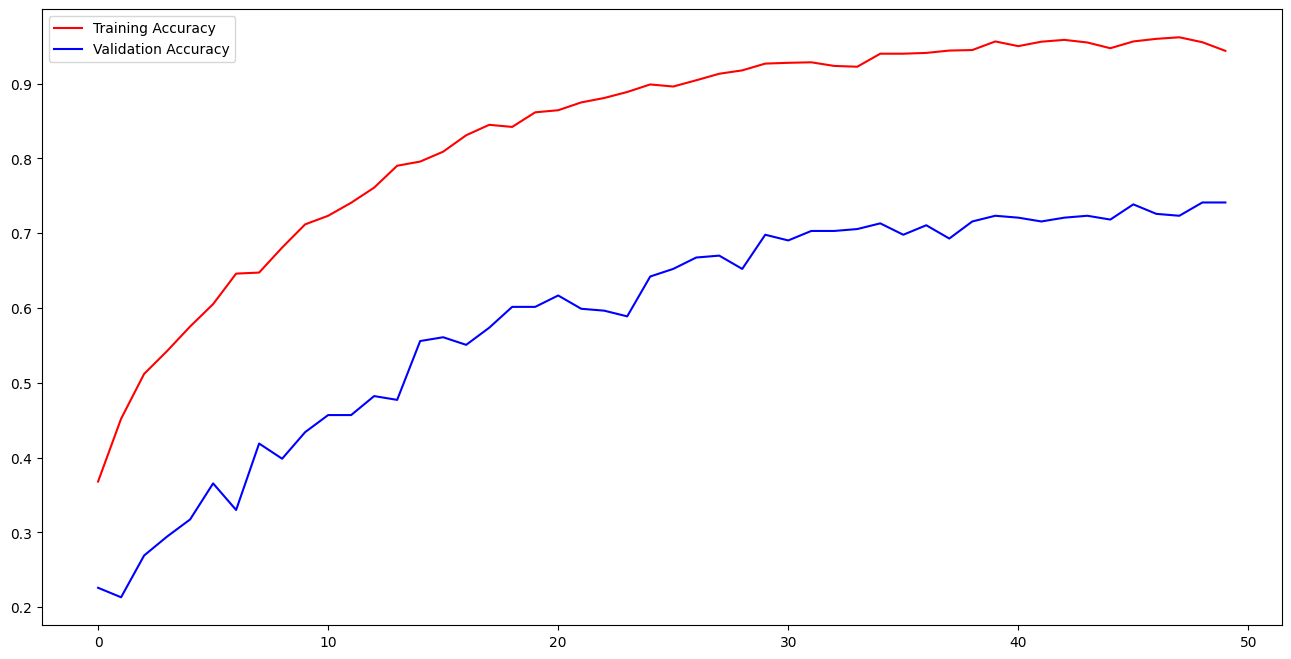

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

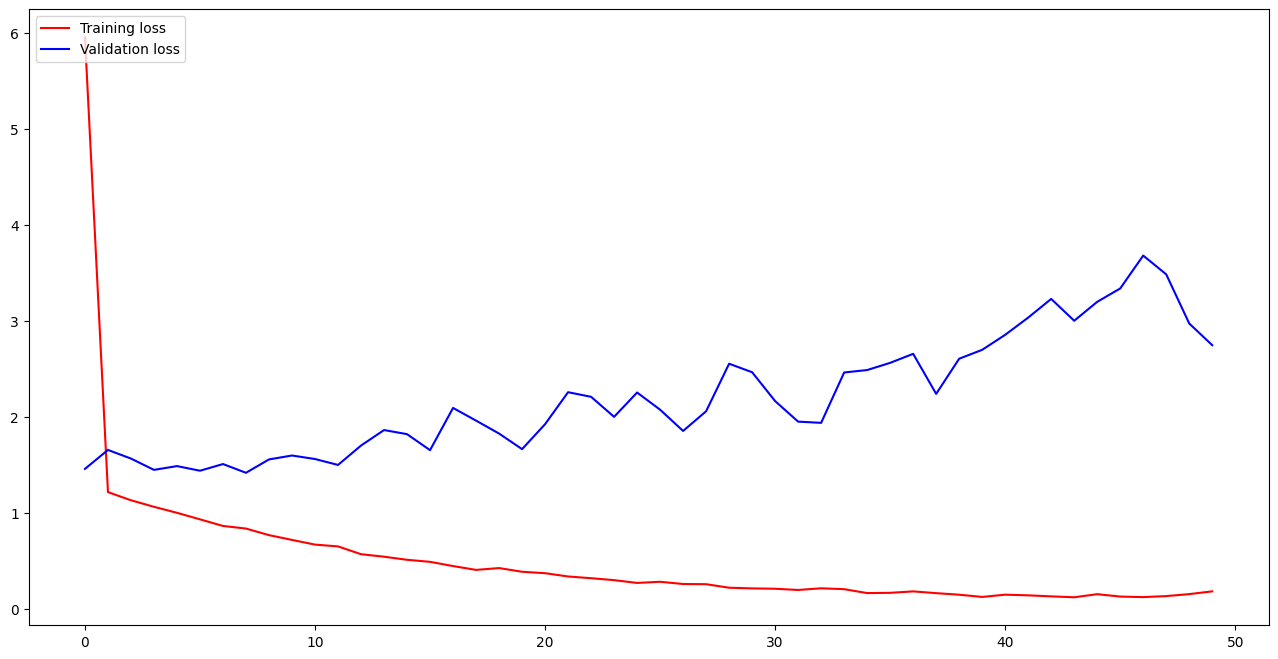

In [8]:
#plots training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

13/13 [==============================] - 1s 21ms/step


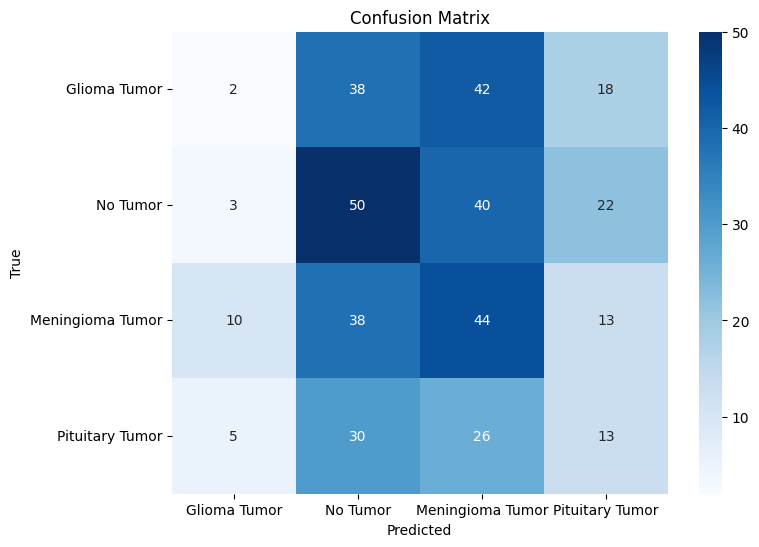

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Predict the labels using the trained model
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# If your true labels are one-hot encoded, convert them to class indices
y_true = np.argmax(y_true, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'],
            yticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tensorflow.keras.preprocessing import image
import cv2

In [11]:

def get_img_array(img, size):
    # `array` is a float32 Numpy array of shape (28, 28, 1)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


1/1 [==============================] - 0s 173ms/step


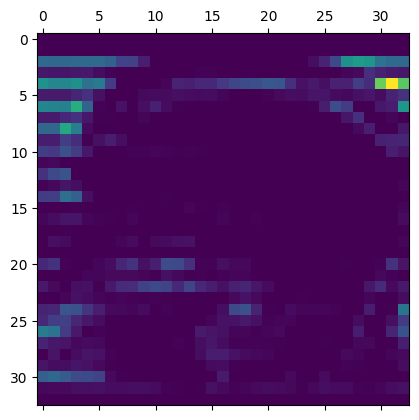

1/1 [==============================] - 0s 20ms/step


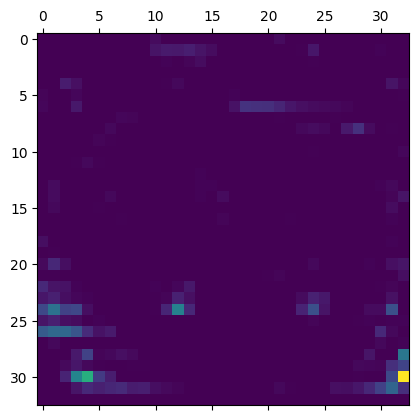

1/1 [==============================] - 0s 20ms/step


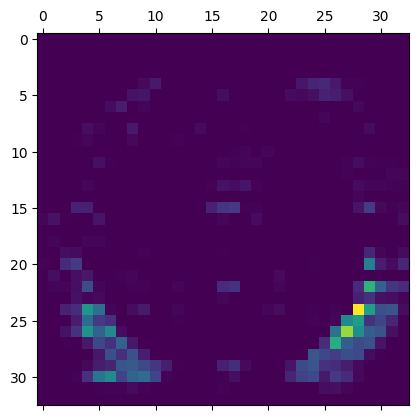

1/1 [==============================] - 0s 19ms/step


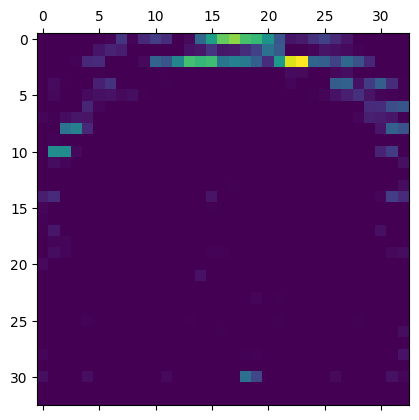

In [12]:
img_size = (150, 150)
last_conv_layer_name = "conv2d_3"
# Remove last layer's softmax
model.layers[-1].activation = None

imglist = ['/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(10).jpg', '/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(10).jpg',
          '/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(10).jpg', '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(10).jpg']

for x in imglist:
    # Replace 'your_image_path.jpg' with the actual path to your image
    image_path = x

    # Read the image and resize it to the desired size
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)

    # Convert the grayscale image to a three-channel image
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Expand the dimensions to make it compatible with the model input
    img = np.expand_dims(img, axis=0)
    
    preds = model.predict(img)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()




# Print what the top predicted class is
# preds = model.predict(img)

# # Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# # Display heatmap
# plt.matshow(heatmap)
# plt.show()


# **TRANSFER LEARNING WITH EFFICIENTNETB3**

In [13]:
base_model=tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(image_width, image_height,3),
    pooling='max',
    classifier_activation="softmax",
)

for layer in base_model.layers:
    layer.trainable = False
    
premodel=kb.Sequential([
    base_model,
    kb.layers.BatchNormalization(axis=-1, momentum=0.016),
    kb.layers.Dense(512,kernel_regularizer=regularizers.l2(0.016), activation='relu'),
    kb.layers.Dropout(0.2),
    kb.layers.Dense(64,kernel_regularizer=regularizers.l2(0.016), activation='relu'),
    kb.layers.Dropout(0.2),
    kb.layers.Dense(4, activation='softmax')    
])

premodel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

premodel.summary()

43941136/43941136 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 512)               786944    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                       

In [14]:
prehistory = premodel.fit(train_ds,
                    epochs = 50,
                    validation_data = test_ds
                    )

Epoch 1/50


2023-12-14 01:03:18.701651: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


90/90 [==============================] - 21s 97ms/step - loss: 10.4867 - accuracy: 0.7199 - val_loss: 6.6680 - val_accuracy: 0.6244
Epoch 2/50
90/90 [==============================] - 5s 57ms/step - loss: 4.0091 - accuracy: 0.8136 - val_loss: 3.0045 - val_accuracy: 0.6472
Epoch 3/50
90/90 [==============================] - 5s 56ms/step - loss: 1.8912 - accuracy: 0.8279 - val_loss: 1.9420 - val_accuracy: 0.6701
Epoch 4/50
90/90 [==============================] - 5s 55ms/step - loss: 1.2440 - accuracy: 0.8359 - val_loss: 1.8748 - val_accuracy: 0.6320
Epoch 5/50
90/90 [==============================] - 5s 55ms/step - loss: 1.0443 - accuracy: 0.8254 - val_loss: 1.6462 - val_accuracy: 0.6726
Epoch 6/50
90/90 [==============================] - 5s 55ms/step - loss: 0.9208 - accuracy: 0.8328 - val_loss: 1.4517 - val_accuracy: 0.6802
Epoch 7/50
90/90 [==============================] - 5s 56ms/step - loss: 0.8696 - accuracy: 0.8387 - val_loss: 1.6542 - val_accuracy: 0.6472
Epoch 8/50
90/90 [====

In [15]:
# Evaluate the model on the train dataset
pretrain_loss, pretrain_accuracy = premodel.evaluate(train_ds)

pretest_loss, pretest_accuracy = premodel.evaluate(test_ds)

# Print the test loss and test accuracy
print(f"Train Loss: {pretrain_loss}")
print(f"Train Accuracy: {pretrain_accuracy}\n")

print(f"Test Loss: {pretest_loss}")
print(f"Test Accuracy: {pretest_accuracy}")

13/13 [==============================] - 1s 44ms/step - loss: 1.2319 - accuracy: 0.7132
Train Loss: 0.3567565381526947
Train Accuracy: 0.9466899037361145

Test Loss: 1.231893539428711
Test Accuracy: 0.7131979465484619


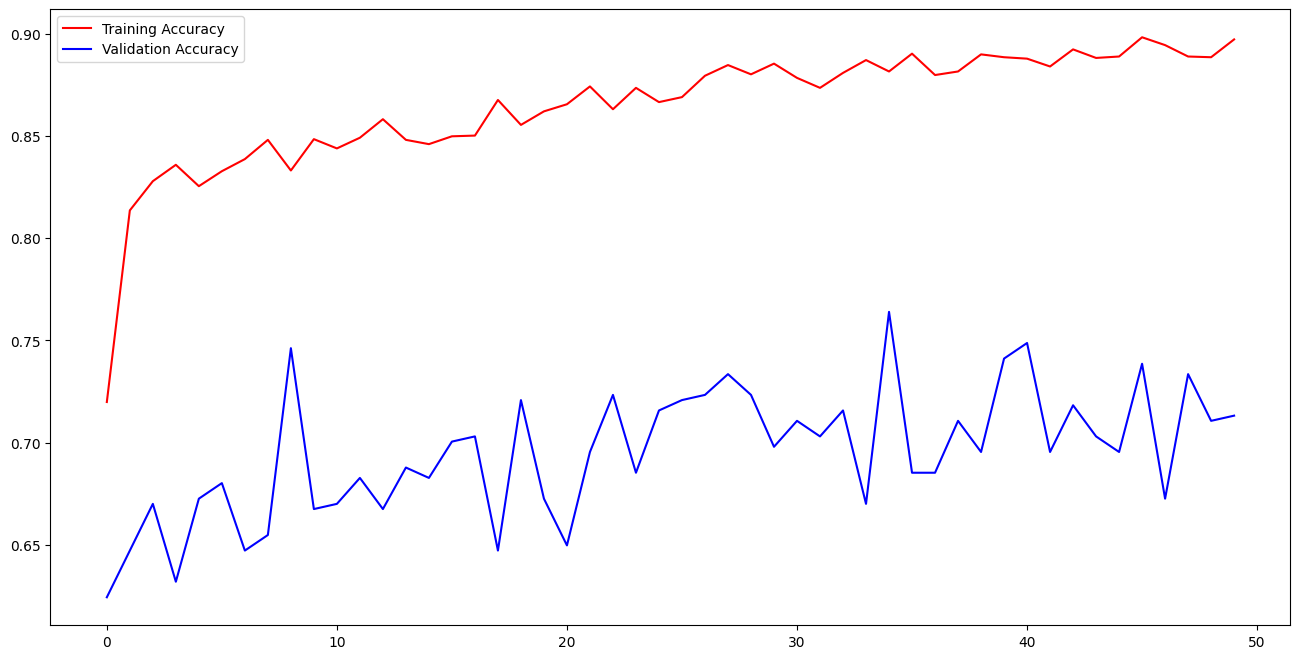

In [16]:
acc = prehistory.history['accuracy']
val_acc = prehistory.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

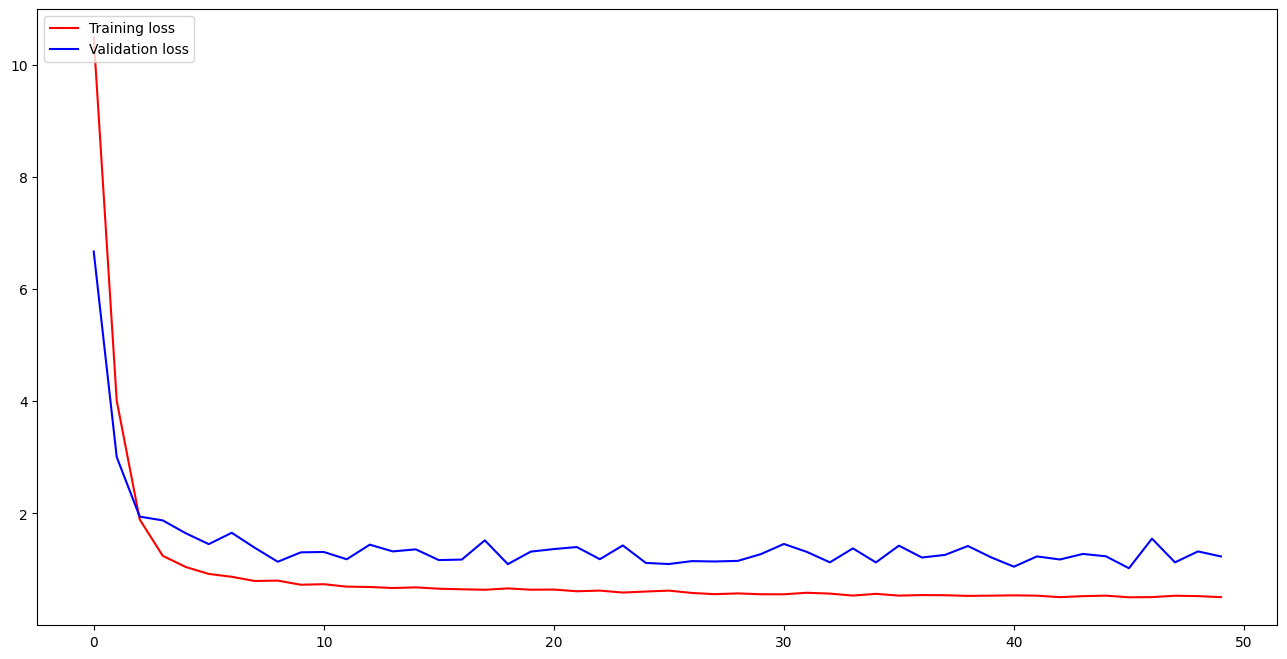

In [17]:
loss = prehistory.history['loss']
val_loss = prehistory.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

13/13 [==============================] - 3s 42ms/step


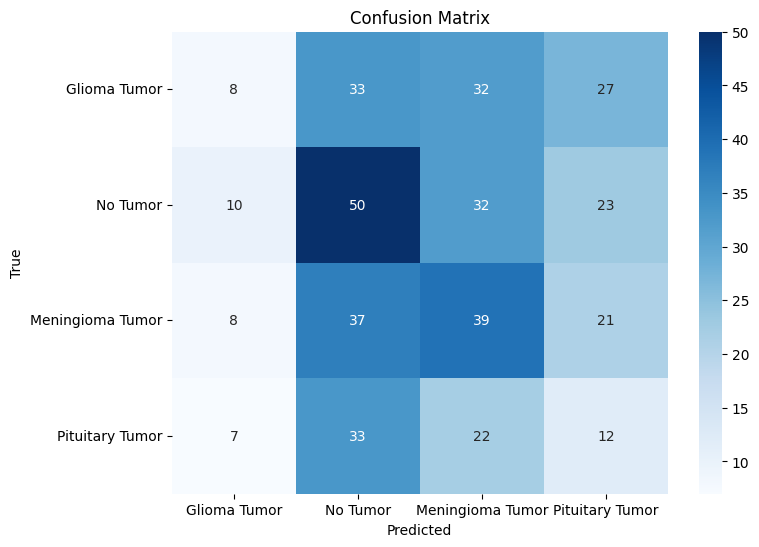

In [18]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Predict the labels using the trained model
y_pred_probs = premodel.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# If your true labels are one-hot encoded, convert them to class indices
y_true = np.argmax(y_true, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'],
            yticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **TRANSFER LEARNING WITH VGG16**

In [19]:
vgg_conv = kb.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (image_width, image_height, 3)
)

vgg_conv.trainable = False
vgg_conv.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [20]:
inputs = kb.Input(shape=(image_width, image_height, 3))
x = kb.applications.vgg16.preprocess_input(inputs)
x = vgg_conv(x)
x = kb.layers.Flatten()(x)
x = kb.layers.BatchNormalization()(x)
x = kb.layers.Dense(100)(x)
x = kb.layers.Dropout(0.3)(x)
x = kb.layers.Dense(50)(x)
x = kb.layers.Dropout(0.3)(x)
x = kb.layers.Dense(4)(x)
x = kb.layers.Dropout(0.3)(x)
outputs = kb.layers.Dense(4, activation="softmax")(x)

custom_ff = kb.Model(inputs, outputs)
custom_ff.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

cushistory = custom_ff.fit(train_ds, epochs = 50, validation_data = test_ds)

Epoch 1/50
90/90 [==============================] - 10s 64ms/step - loss: 2.3571 - accuracy: 0.5714 - val_loss: 7.5148 - val_accuracy: 0.5152
Epoch 2/50
90/90 [==============================] - 4s 46ms/step - loss: 1.4110 - accuracy: 0.6606 - val_loss: 5.7317 - val_accuracy: 0.6294
Epoch 3/50
90/90 [==============================] - 4s 46ms/step - loss: 1.0795 - accuracy: 0.7111 - val_loss: 7.5494 - val_accuracy: 0.6675
Epoch 4/50
90/90 [==============================] - 4s 46ms/step - loss: 0.8308 - accuracy: 0.7512 - val_loss: 6.9321 - val_accuracy: 0.6878
Epoch 5/50
90/90 [==============================] - 5s 48ms/step - loss: 0.6541 - accuracy: 0.7760 - val_loss: 9.5610 - val_accuracy: 0.7056
Epoch 6/50
90/90 [==============================] - 4s 46ms/step - loss: 0.5755 - accuracy: 0.8017 - val_loss: 9.0749 - val_accuracy: 0.7234
Epoch 7/50
90/90 [==============================] - 4s 46ms/step - loss: 0.5208 - accuracy: 0.8202 - val_loss: 9.5505 - val_accuracy: 0.7030
Epoch 8/50
9

In [21]:
# Evaluate the model on the train dataset
customtrain_loss, customtrain_accuracy = custom_ff.evaluate(train_ds)

customtest_loss, customtest_accuracy = custom_ff.evaluate(test_ds)

# Print the test loss and test accuracy
print(f"Train Loss: {customtrain_loss}")
print(f"Train Accuracy: {customtrain_accuracy}\n")
 
    
print(f"Test Loss: {customtest_loss}")
print(f"Test Accuracy: {customtest_accuracy}")

13/13 [==============================] - 1s 36ms/step - loss: 9.6922 - accuracy: 0.7716
Train Loss: 0.043638695031404495
Train Accuracy: 0.9947735071182251

Test Loss: 9.692155838012695
Test Accuracy: 0.7715736031532288


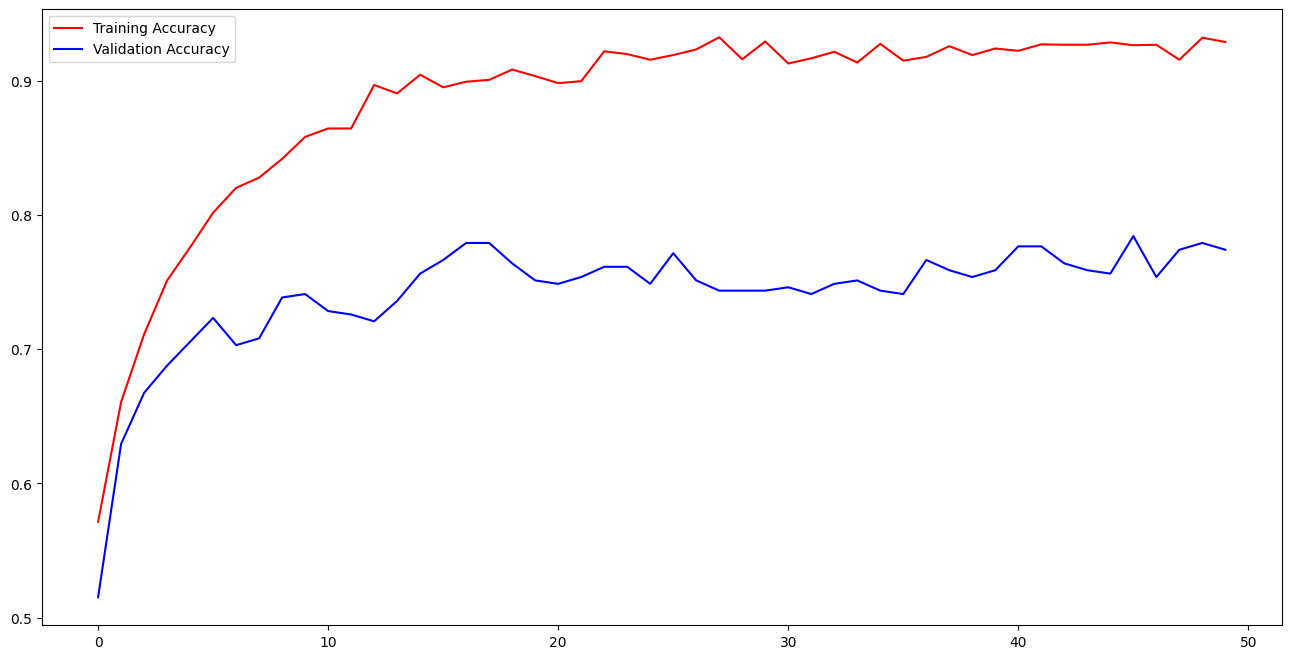

In [22]:
acc = cushistory.history['accuracy']
val_acc = cushistory.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

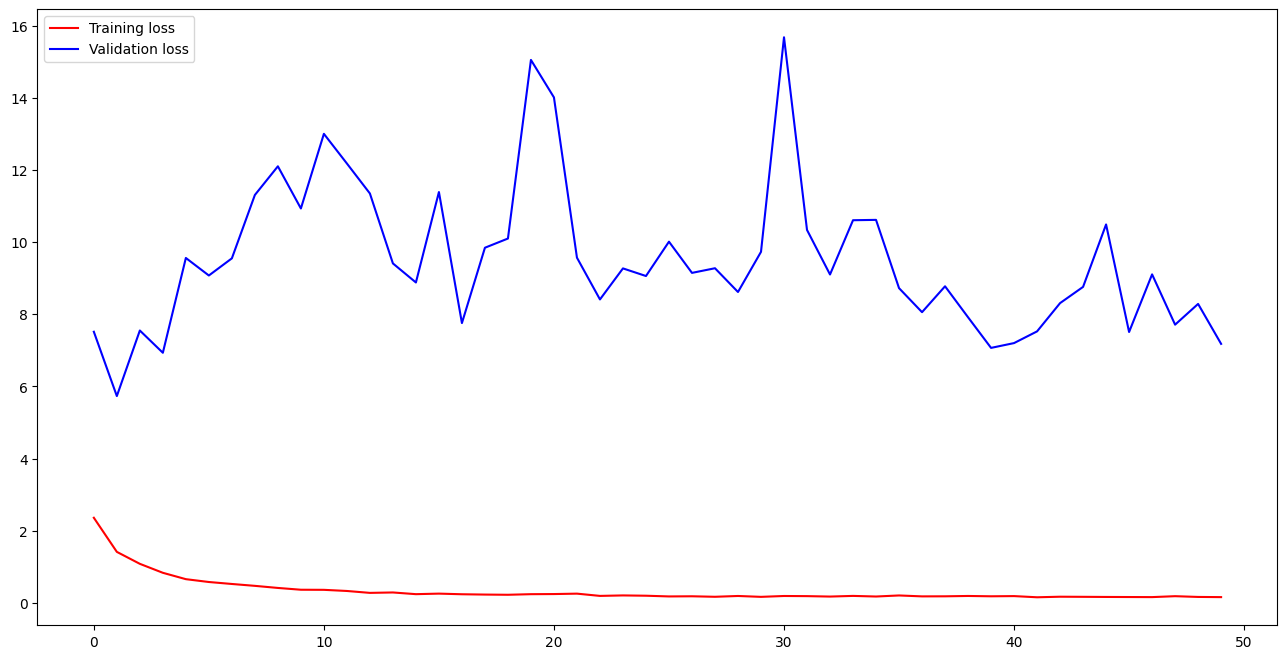

In [23]:
loss = cushistory.history['loss']
val_loss = cushistory.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(16, 8))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

13/13 [==============================] - 1s 35ms/step


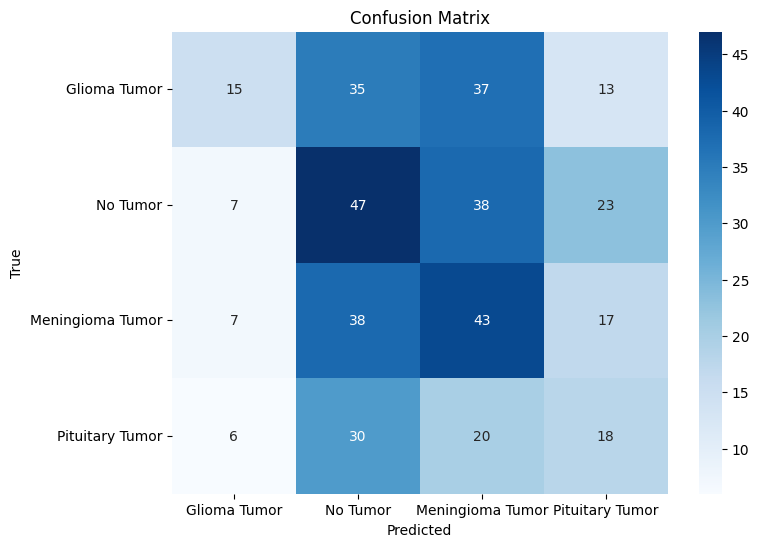

In [24]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Predict the labels using the trained model
y_pred_probs = custom_ff.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# If your true labels are one-hot encoded, convert them to class indices
y_true = np.argmax(y_true, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'],
            yticklabels=['Glioma Tumor', 'No Tumor', 'Meningioma Tumor', 'Pituitary Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()